In [1]:
from utils import download_and_unzip, get_dataloaders, visualize_samples

In [2]:
download_and_unzip()

Dataset already exists, skipping download.


In [3]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
train_loader, val_loader = get_dataloaders()

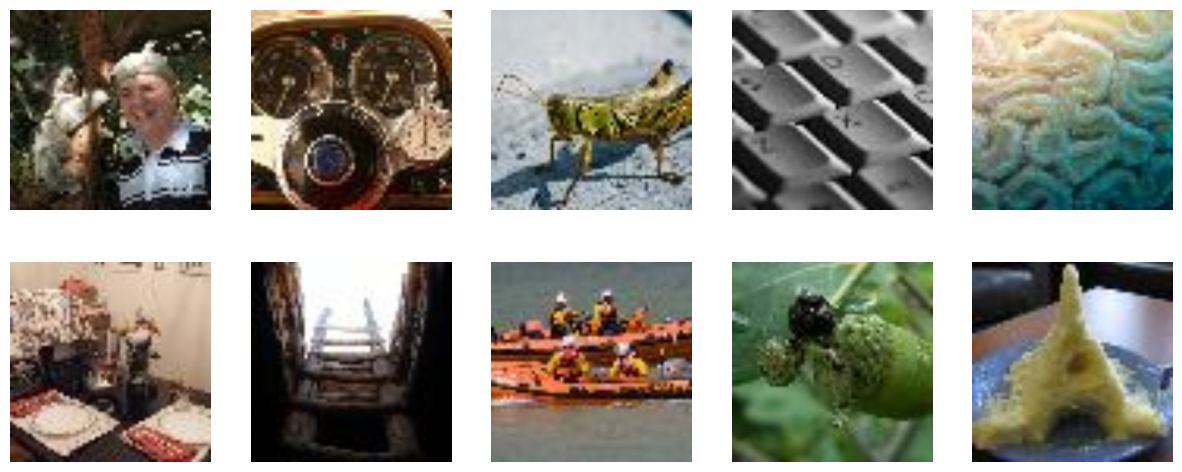

In [5]:
visualize_samples(train_loader)

In [6]:
from models import CustomNet
model = CustomNet(input_shape=(3, 224, 224), num_classes=200).to(device)

Input to the Fully Connected layer is of size: 18432


In [7]:
from torch import nn

from eval import validate
from train import train

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

best_acc = 0

# Run the training process for {num_epochs} epochs
num_epochs = 1
for epoch in range(1, num_epochs + 1):
    print(f"Started epoch {epoch}")

    print("Training...")
    train(epoch, model, train_loader, criterion, optimizer, verbose=True)

    # At the end of each training iteration, perform a validation step
    print("Validating...")
    val_accuracy = validate(model, val_loader, criterion, verbose=True)

    print(f"Accuracy on validation at epoch {epoch} / {num_epochs} ({epoch/num_epochs*100:.2f}%): {val_accuracy}")

    # Best validation accuracy
    best_acc = max(best_acc, val_accuracy)

print(f'Best validation accuracy: {best_acc:.2f}%')

Started epoch 1
Training...
Setted model in train mode
Processing batch 0 (0.00%)


KeyboardInterrupt: 